# 1. Latar Belakang - Netflix Original Films & IMDB Scores

![Netflix Originals](https://www.whats-on-netflix.com/wp-content/uploads/2018/03/list-of-netflix-originals.jpg)

Netflix Original Films adalah kumpulan film yang diproduksi atau didanai oleh Netflix dan dirilis secara eksklusif di platform mereka. Netflix telah menciptakan beragam jenis film orisinal, mulai dari drama, komedi, horor, aksi, animasi, dan banyak lagi.

IMDb merupakan basis data daring yang menyediakan informasi tentang film, program televisi, dan para pemainnya. Selain itu, IMDb juga memiliki sistem peringkat di mana pengguna dapat memberikan penilaian dan ulasan untuk film-film yang mereka tonton. Penilaian IMDb mencerminkan beragam pendapat pengguna dan dapat menjadi indikator popularitas serta penerimaan film di kalangan penonton.

Untuk mempertahankan keuntungan, Netflix mengandalkan pendapatan dari langganan para pelanggan. Oleh karena itu, Netflix perlu terus menyajikan konten berkualitas agar pelanggan tetap berlangganan. Netflix memiliki data penilaian IMDb untuk film-film orisinal mereka mulai dari 13 Desember 2014 hingga 1 Juni 2021. Penilaian tersebut dianggap kredibel karena diambil dari sumber pihak ketiga tanpa campur tangan dari Netflix. Data ini sangat berharga bagi perusahaan untuk mendapatkan _Insight_ tentang film-film orisinal Netflix. Dalam proyek ini, peran kita sebagai analis data di Netflix adalah menganalisis data tersebut dan memberikan rekomendasi kepada Chief Creative Officer untuk mendukung pengambilan keputusan strategis di Netflix terkait jenis film apa yang sebaiknya diproduksi pada tahun mendatang.

# 2. Problem Statement

Sebagai perusahaan, Netflix perlu memperoleh _insight_ yang tepat mengenai karakteristik film yang sebaiknya diproduksi. Dalam rangka membantu perusahaan mendapatkan _insight__ yang lebih baik, sebagai data analyst, kita akan menganalisis data yang tersedia. Dengan mempertimbangkan faktor-faktor yang ada, kita dapat menyajikan rekomendasi berdasarkan kecenderungan dan permintaan yang ada.  Sebagai data analyst, kita akan berusaha menjawab pertanyaan berikut ini:
__Apa karakteristik film yang sebaiknya diproduksi oleh Netflix ke depan?__

# Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data peserta yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://drive.google.com/file/d/1Vd0p1foOnYAEfMMHSiPAQLoo_6X7PJkh/view?usp=share_link). 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
from IPython.display import display

Dataset ini berisi informasi terkait demografis, edukasi dan pengalaman kerja kandidat yang diisi ketika peserta mendaftar untuk ikut pelatihan. Ada 14 kolom di dalam dataset hr_analytics, yaitu:  

* Title: Title of the film
* Genre: Genre of the film
* Premiere: Original premiere date
* Runtime: Runtime in minutes
* IMDB Score: IMDB scores (as of 06/01/21)
* Language: Languages currently available (as of 06/01/21) 


In [2]:
df = pd.read_csv('Netflix Originals.csv').drop('Unnamed: 0', axis=1)
display(df.head())
display(df.tail())

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,#REALITYHIGH,Comedy,8-Sep-17,99,5.2,English
1,13th,Documentary,7-Oct-16,100,8.2,English
2,13th: A Conversation with Oprah Winfrey & Ava ...,Aftershow / Interview,26-Jan-17,36,7.1,English
3,15-Aug,Comedy-drama,29-Mar-19,124,5.8,Marathi
4,1922,Horror/Crime drama,20-Oct-17,102,6.3,English


,Title,Genre,Premiere,Runtime,IMDB Score,Language
579,XOXO,Drama,26-Aug-16,92,5.3,English
580,Yeh Ballet,Drama,21-Feb-20,117,7.6,Hindi
581,Yes Day,Comedy,12-Mar-21,86,5.7,English
582,You've Got This,Romantic comedy,2-Oct-20,111,5.8,Spanish
583,Zion,Documentary,10-Aug-18,11,7.2,English


## Data Understanding and Cleaning


Sebelum memulai analisis, penting bagi kita untuk memahami dataset secara mendalam melalui tahap data understanding. Pada tahap ini, kita akan mengidentifikasi anomali-anomali yang ada dalam dataset dan menangani mereka pada tahap data cleaning. Setiap tindakan yang diambil untuk menangani anomali tersebut akan didasarkan pada pengetahuan domain yang relevan serta analisis statistik yang tepat.

In [3]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (584, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [4]:
display(df.describe(), df.describe(include='object'))

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.273288
std,27.761683,0.978590
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


,Title,Genre,Premiere,Language
count,584,584,584,584
unique,584,115,388,38
top,#REALITYHIGH,Documentary,2-Oct-20,English
freq,1,159,6,401


In [5]:
pd.set_option('display.max_colwidth', None)
# data unik di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Title,584,"[#REALITYHIGH, 13th, 13th: A Conversation with Oprah Winfrey & Ava DuVernay, 15-Aug, 1922, 22-Jul, 5 Star Christmas, 6 Balloons, 6 Underground, 7 años, A 3 Minute Hug, A Babysitter's Guide to Monster Hunting, A California Christmas, A Christmas Prince, A Christmas Prince: The Royal Baby, A Christmas Prince: The Royal Wedding, A Fall from Grace, A Futile and Stupid Gesture, A Life of Speed: The Juan Manuel Fangio Story, A Love Song for Latasha, A Secret Love, A Tale of Two Kitchens, A Very Murray Christmas, A Week Away, A Whisker Away, After Maria, After the Raid, Airplane Mode, Ajeeb Daastaans, AK vs AK, Alex Strangelove, Alien Xmas, All Because of You, All Day and a Night, All in My Family, All the Bright Places, All Together Now, Altered Carbon: Resleeved, Always Be My Maybe, Amanda Knox, Amateur, American Factory, American Factory: A Conversation with the Obamas , American Murder: The Family Next Door, American Son, Anelka: Misunderstood, Angela's Christmas, Angela's Christmas Wish, Anima, Antoine Griezmann: The Making of a Legend, Apostle, Ariana Grande: Excuse Me, I Love You, Arlo the Alligator Boy, Army of the Dead, ARQ, Athlete A, Audrie & Daisy, Back to School, Bad Trip, Baggio: The Divine Ponytail, Barbra: The Music, The Mem'ries, The Magic!, Barry, Beasts of No Nation, Beats, Becoming, Been So Long, Below Zero, Ben Platt: Live from Radio City Music Hall, Benji, Between Two Ferns: The Movie, Bigflo & Oil: Hip Hop Frenzy, Biggie: I Got a Story to Tell, Bikram: Yogi, Guru, Predator, Bird Box, Birders, Blackpink: Light Up the Sky, Blame!, Blue Miracle, Bomb Scared, Brahman Naman, Brene Brown: The Call to Courage, Bright, Bulbbul, Burning Sands, Cadaver, Calibre, Cam, Candy Jar, Canvas , Cargo, Casting JonBenet, Caught by a Wave, Chadwick Boseman: Portrait of an Artist, Chasing Coral , Choked: Paisa Bolta Hai, Chopsticks, Christmas Crossfire, Christmas Inheritance, Circus of Books, Citation, ...]"
1,Genre,115,"[Comedy, Documentary, Aftershow / Interview, Comedy-drama, Horror/Crime drama, Drama, Action, Comedy/Fantasy/Family, Romantic comedy, Thriller, Biographical/Comedy, Comedy / Musical, Christian musical, Anime/Fantasy, Stop Motion, Action comedy, Romance, Anime/Science fiction, Sports-drama, Animation, Musical / Short, Horror-thriller, Concert Film, Animated musical comedy, Zombie/Heist, Science fiction/Thriller, Hidden-camera prank comedy, Biopic, War drama, Musical, Family film, Psychological thriller, Black comedy, Urban fantasy, Horror, Psychological horror, Animation / Short, Drama/Horror, Romantic teen drama, Romantic drama, Heist, Musical comedy, Family, Horror thriller, Mentalism special, Christmas musical, Teen comedy-drama, Mystery, Dark comedy, Crime drama, Animation/Superhero, Family/Comedy-drama, Mockumentary, Supernatural drama, Action/Comedy, Horror anthology, Romantic comedy/Holiday, Adventure-romance, Action-thriller, Animation / Science Fiction, Science fiction/Drama, Family/Christmas musical, Variety show, Animation/Christmas/Comedy/Adventure, Comedy horror, One-man show, Anthology/Dark comedy, Variety Show, Adventure, Comedy mystery, Science fiction/Mystery, Action-adventure, Historical-epic, Action/Science fiction, Animation/Musical/Adventure, Science fiction thriller, Drama-Comedy, Musical/Western/Fantasy, Romance drama, Superhero, Romantic thriller, Psychological thriller drama, Science fiction adventure, Satire, Making-of, Animation / Comedy, War, Science fiction, Coming-of-age comedy-drama, Crime thriller, Romantic comedy-drama, Anime / Short, Science fiction/Action, Animation / Musicial, Spy thriller, Teen comedy horror, Comedy/Horror, Western, Christmas/Fantasy/Adventure/Comedy, Christmas comedy, ...]"
2,Premiere,388,"[8-Sep-17, 7-Oct-16, 26-Jan-17, 29-Mar-19, 20-Oct-17, 10-Oct-18, 7-Dec-18, 6-Apr-18, 13-Dec-19, 28-Oct-16, 28-Oct-19, 15-Oct-20, 14-Dec-20, 17-Nov-17, 5-Dec-19, 30-Nov-18, 17-Jan-20, 26-Jan-18, 20-Mar-20, 21-Sep-20, 29-Ap

Secara umum, kita bisa melihat bahwa:
* Dataset Netflix Originals memiliki 6 kolom dan 584 baris
* Kolom yaitu `IMDB Score` 4 memiliki data kosong.
* Formating dalam kolom `Premiere` terdapat 1 value dengan format berbeda

# Find Missing Data

In [6]:
df.isnull().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

sebelumnya terdapat missing value di kolom IMDB Score berjumlah 4. Untuk tidak lanjut dari missing value yang ada, dilakukan pengisian secara manual dengan cara mencai informasi di website IMDB terkait dengan score yang kosong,

# Duplicate Data

In [7]:
df.duplicated().sum()

0

Pada dtataset ini tidak terdapat data duplikat

# Outliers

Text(0.5, 1.0, 'IMDB Score')

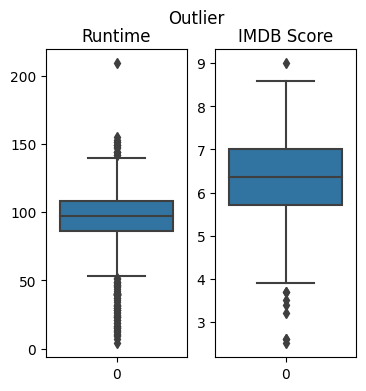

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(4, 4))
sns.boxplot(df["Runtime"], ax=axes[0])         # Ada Outlier
sns.boxplot(df["IMDB Score"], ax=axes[1])      # Ada Outlier
fig.suptitle('Outlier')

axes[0].set_title("Runtime")
axes[1].set_title("IMDB Score")

Terdapat outlier di kolom `Runtime` dan `IMDB Score`, namun tidak dilakuan data cleaning karena di kolom `Runtime` sendiri untuk seberapa panjang atau pendek durasi film hak dari rumah produksi untuk menentukan seberapa panjang durasi film, dan untuk `IMDB Score` penilaian berapapuan dari penonton dianggap normal selama penilaian berada dalam rentang 0-10.

# Data Formating

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


Premiere akan diubah ke datetime karena bisa jadi akan digunakan untuk di analisis kedepannya.

In [10]:
df['Premiere'] = pd.to_datetime(df['Premiere'], format='%d-%b-%y')
df['Month'] = df['Premiere'].dt.month
df['year'] = df['Premiere'].dt.year
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Month,year
0,#REALITYHIGH,Comedy,2017-09-08,99,5.2,English,9,2017
1,13th,Documentary,2016-10-07,100,8.2,English,10,2016
2,13th: A Conversation with Oprah Winfrey & Ava DuVernay,Aftershow / Interview,2017-01-26,36,7.1,English,1,2017
3,15-Aug,Comedy-drama,2019-03-29,124,5.8,Marathi,3,2019
4,1922,Horror/Crime drama,2017-10-20,102,6.3,English,10,2017


Sebelumnya terdapat 1 data dengan foramat tanggal yang belum tepat, karena tidak banyak maka dilakukan ganti format secara manual di file csv menggunaka excel

---
## **DATA ANALYSIS**

Setelah tahap data cleaning, maka data siap untuk dianalisis. Berikut tabel yang sudah bersih:

In [11]:
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Month,year
0,#REALITYHIGH,Comedy,2017-09-08,99,5.2,English,9,2017
1,13th,Documentary,2016-10-07,100,8.2,English,10,2016
2,13th: A Conversation with Oprah Winfrey & Ava DuVernay,Aftershow / Interview,2017-01-26,36,7.1,English,1,2017
3,15-Aug,Comedy-drama,2019-03-29,124,5.8,Marathi,3,2019
4,1922,Horror/Crime drama,2017-10-20,102,6.3,English,10,2017


Pertama kita akan mengkategorikan film kedalam 'Long' film dan 'Short' film. Menurut Rotterdam International Film Festival Rotterdam, film dapat dikategorikan kedalam film pendek yaitu dengan waktu penayangan dibawah 60 menit

In [12]:
df['Length'] = pd.cut(df['Runtime'], bins=[0, 60, float('inf')], labels=['Short', 'Long'])
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Month,year,Length
0,#REALITYHIGH,Comedy,2017-09-08,99,5.2,English,9,2017,Long
1,13th,Documentary,2016-10-07,100,8.2,English,10,2016,Long
2,13th: A Conversation with Oprah Winfrey & Ava DuVernay,Aftershow / Interview,2017-01-26,36,7.1,English,1,2017,Short
3,15-Aug,Comedy-drama,2019-03-29,124,5.8,Marathi,3,2019,Long
4,1922,Horror/Crime drama,2017-10-20,102,6.3,English,10,2017,Long
...,...,...,...,...,...,...,...,...,...
579,XOXO,Drama,2016-08-26,92,5.3,English,8,2016,Long
580,Yeh Ballet,Drama,2020-02-21,117,7.6,Hindi,2,2020,Long
581,Yes Day,Comedy,2021-03-12,86,5.7,English,3,2021,Long
582,You've Got This,Romantic comedy,2020-10-02,111,5.8,Spanish,10,2020,Long


In [13]:
length_count = df.groupby('Length').count()['Title'].reset_index()
length_count = length_count.rename(columns={'Title': 'Count'})
length_count

,Length,Count
0,Short,71
1,Long,513


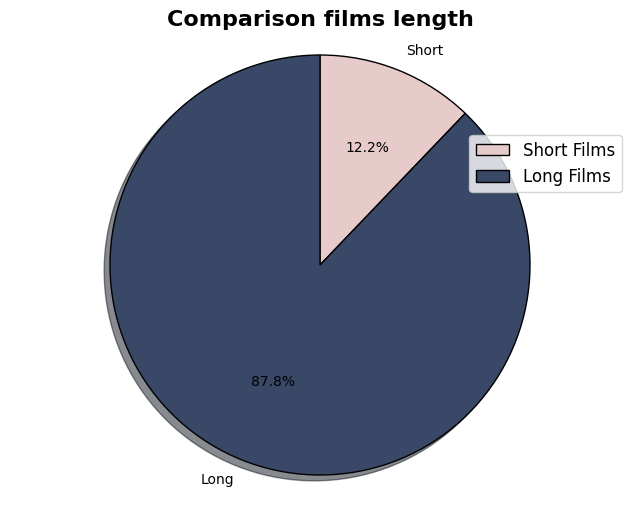

In [14]:
plt.figure(figsize=(8, 6))

colors = ['#E7CBCB', '#394867']

explode = (0.5, 0)  
plt.pie(length_count['Count'],
        labels=length_count['Length'],
        autopct='%.1f%%',
        colors=colors,
        startangle=90,
        counterclock=False,
        shadow=True,  
        wedgeprops={'edgecolor': 'black', 'linewidth': 1} 
)

plt.axis('equal')
plt.title('Comparison films length', fontsize=16, fontweight='bold')

legend_labels = ['Short Films', 'Long Films']
plt.legend(legend_labels, loc='upper right', bbox_to_anchor=(1, 0.8), fontsize=12)

plt.show()


**Analisis** 
<P> Distribusi Durasi Film mayoritas film memiliki durasi panjang dengan 513 film, sementara film dengan durasi singkat hanya sebanyak 71 film.
Dengan informasi ini, kita dapat melihat bahwa film berdurasi panjang memiliki jumlah lebih banyak daripada film berdurasi pendek , ini menunjukkan bahwa film dengan durasi panjang lebih umum dalam platform Netflix.
<p>Yang sudah kita tahu bahwa untuk persebaran data angka paling banyak pada Film berdurasi panjang, film berdurasi pendek memiliki jumlah yang sedikit, namun tetap saja ada pengemarnya, maka dari itu perlu dilakukan analisa mendalam mengenai Film bedurasi panjang maupun pendek<p>



# IMDB Score

In [15]:
long_data = df[df['Length'] == 'Long']
long_data.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Month,year,Length
0,#REALITYHIGH,Comedy,2017-09-08,99,5.2,English,9,2017,Long
1,13th,Documentary,2016-10-07,100,8.2,English,10,2016,Long
3,15-Aug,Comedy-drama,2019-03-29,124,5.8,Marathi,3,2019,Long
4,1922,Horror/Crime drama,2017-10-20,102,6.3,English,10,2017,Long
5,22-Jul,Drama,2018-10-10,144,6.8,English,10,2018,Long


In [16]:
short_data= df[df['Length']== 'Short']
short_data.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Month,year,Length
2,13th: A Conversation with Oprah Winfrey & Ava DuVernay,Aftershow / Interview,2017-01-26,36,7.1,English,1,2017,Short
10,A 3 Minute Hug,Documentary,2019-10-28,28,6.5,English/Spanish,10,2019,Short
19,A Love Song for Latasha,Documentary,2020-09-21,19,6.8,English,9,2020,Short
21,A Tale of Two Kitchens,Documentary,2019-05-22,30,6.3,English/Spanish,5,2019,Short
22,A Very Murray Christmas,Comedy / Musical,2015-12-04,56,5.5,English,12,2015,Short


In [17]:
genre_counts = long_data['Genre'].value_counts()
genre_counts = genre_counts.reset_index().head()
genre_counts

,Genre,count
0,Documentary,118
1,Drama,77
2,Comedy,47
3,Romantic comedy,39
4,Thriller,33


In [18]:
filter_genre = long_data['Genre'].value_counts()
filter_count = filter_genre[filter_genre > 1]
filtered_data = long_data[long_data['Genre'].isin(filter_count.index)]
filtered_data


,Title,Genre,Premiere,Runtime,IMDB Score,Language,Month,year,Length
0,#REALITYHIGH,Comedy,2017-09-08,99,5.2,English,9,2017,Long
1,13th,Documentary,2016-10-07,100,8.2,English,10,2016,Long
3,15-Aug,Comedy-drama,2019-03-29,124,5.8,Marathi,3,2019,Long
5,22-Jul,Drama,2018-10-10,144,6.8,English,10,2018,Long
6,5 Star Christmas,Comedy,2018-12-07,95,4.6,Italian,12,2018,Long
...,...,...,...,...,...,...,...,...,...
577,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian,10,2015,Long
579,XOXO,Drama,2016-08-26,92,5.3,English,8,2016,Long
580,Yeh Ballet,Drama,2020-02-21,117,7.6,Hindi,2,2020,Long
581,Yes Day,Comedy,2021-03-12,86,5.7,English,3,2021,Long


In [19]:
average_scores = filtered_data.groupby('Genre')['IMDB Score'].mean().sort_values(ascending=False)
average_scores = average_scores.round(2) 
average_scores = average_scores.reset_index().head()
average_scores

,Genre,IMDB Score
0,One-man show,7.80
1,Concert Film,7.63
2,War drama,7.10
3,Documentary,7.08
4,War,6.75


In [20]:
genre_counts2 = short_data['Genre'].value_counts()
genre_counts2= genre_counts2.reset_index().head()
genre_counts2

,Genre,count
0,Documentary,41
1,Aftershow / Interview,6
2,Animation / Short,4
3,Animation,3
4,Comedy / Musical,2


In [21]:
filter_genre2 = short_data['Genre'].value_counts()
filter_count2 = filter_genre2[filter_genre2 > 1]
filtered_data2 = short_data[short_data['Genre'].isin(filter_count.index)]
filtered_data2.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Month,year,Length
10,A 3 Minute Hug,Documentary,2019-10-28,28,6.5,English/Spanish,10,2019,Short
19,A Love Song for Latasha,Documentary,2020-09-21,19,6.8,English,9,2020,Short
21,A Tale of Two Kitchens,Documentary,2019-05-22,30,6.3,English/Spanish,5,2019,Short
25,After Maria,Documentary,2019-05-24,37,4.6,English/Spanish,5,2019,Short
26,After the Raid,Documentary,2019-12-19,25,4.3,Spanish,12,2019,Short


In [22]:
average_scores2 = filtered_data2.groupby('Genre')['IMDB Score'].mean().sort_values(ascending=False)
average_scores2 = average_scores2.round(2) 
average_scores2 = average_scores2.reset_index().head()
average_scores2

,Genre,IMDB Score
0,Animation,7.17
1,Documentary,6.52
2,One-man show,5.80
3,Comedy,5.45
4,Variety show,5.40


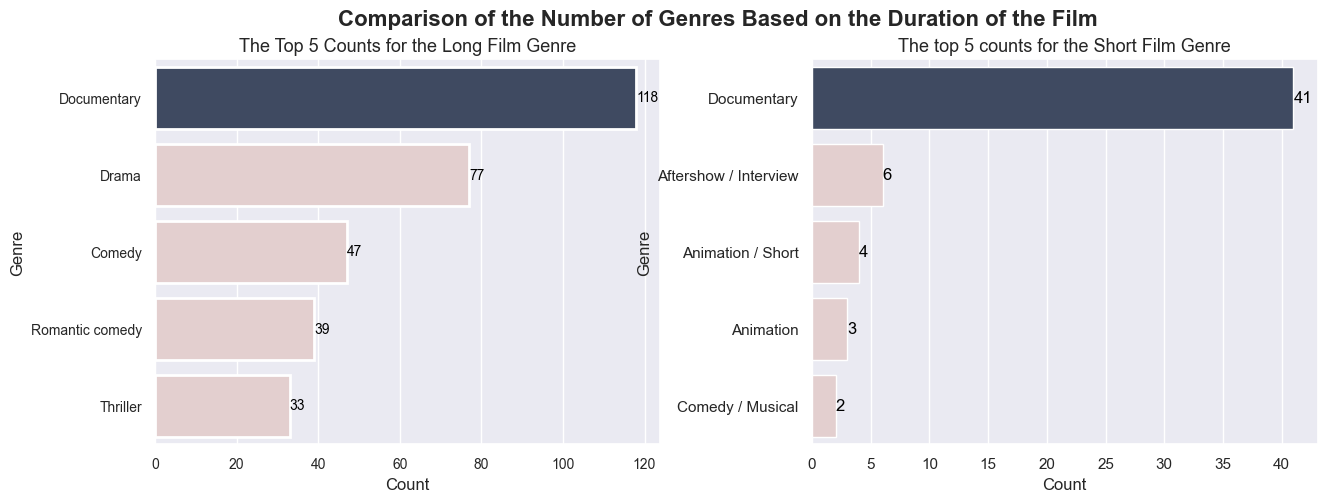

In [32]:
plt.figure(figsize=(15, 5))
sns.set(rc={'figure.figsize': (15, 6)})
plt.suptitle('Comparison of the Number of Genres Based on the Duration of the Film', fontsize=16, fontweight='bold')

# Subplot 1
ax1 = plt.subplot(1, 2, 1)

sns.barplot(x='count',
            y='Genre',
            data=genre_counts,
            palette=['#394867', '#E7CBCB', '#E7CBCB', '#E7CBCB', '#E7CBCB'],
            linewidth=2)
plt.title('The Top 5 Counts for the Long Film Genre', fontsize=13)
plt.ylabel('Genre', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
for i, v in enumerate(genre_counts['count']):
    ax1.text(v, i, str(v), color='black', va='center', fontsize=10)

# Subplot 2
ax2 = plt.subplot(1, 2, 2)
sns.barplot(x='count',
            y='Genre',
            data=genre_counts2,
            palette=['#394867', '#E7CBCB', '#E7CBCB', '#E7CBCB', '#E7CBCB'])
plt.title('The top 5 counts for the Short Film Genre', fontsize=13)
plt.ylabel('Genre')
plt.xlabel('Count')
for i, v in enumerate(genre_counts2['count']):
    ax2.text(v, i, str(v), color='black', va='center')

plt.subplots_adjust(wspace=0.3)
plt.show()



**Analisis** 
<P>Dari grafik diatas mengenai jumlah genre film berdasarkan durasi yang panjang dan film berdurasi pendek, dapat diberikan beberapa insight:

Film Berdurasi Panjang:

1. Genre dengan jumlah film terbanyak adalah genre Documentary, dengan total 118 film.
2. Setelah genre Documentary, genre Drama memiliki jumlah film yang signifikan, yaitu 77 film.
3. Genre Comedy juga memiliki jumlah film yang cukup banyak, mencapai 47 film.
4. Romantic comedy dan Thriller merupakan genre dengan jumlah film yang sedikit lebih rendah, yaitu 39 dan 33 film masing-masing.

Film Berdurasi Pendek:

1. Genre dengan jumlah film terbanyak pada dataframe ini adalah genre Documentary, dengan total 41 film.
2. Genre Aftershow / Interview juga memiliki jumlah film yang cukup signifikan, yaitu 6 film.
3. Terdapat beberapa genre dengan jumlah film yang relatif sedikit, seperti Animation / Short, Animation, dan Comedy / Musical, dengan total masing-masing 4, 3, dan 2 film.<P>

Drama adalah genre yang dapat mencakup banyak cerita dan dapat membuat penonton tertegun. Sementara itu, genre Aftershow/Wawancara dan animasi memberikan informasi di balik layar yang menarik dan memberikan kesempatan bagi para pembuat film untuk bercerita dengan cara yang lebih kreatif.Film dokumenter memiliki potensi besar untuk mengedukasi dan menghibur penonton dengan membawa cerita tentang budaya, peristiwa sejarah, dan kisah inspiratif orang sungguhan. Genre film dokumenter adalah yang paling banyak diproduksi di Netflix baik untuk film berdurasi panjang maupun pendek, oleh karena itu layak diberikan perhatian khusus terhadap analisis berikutnya. 

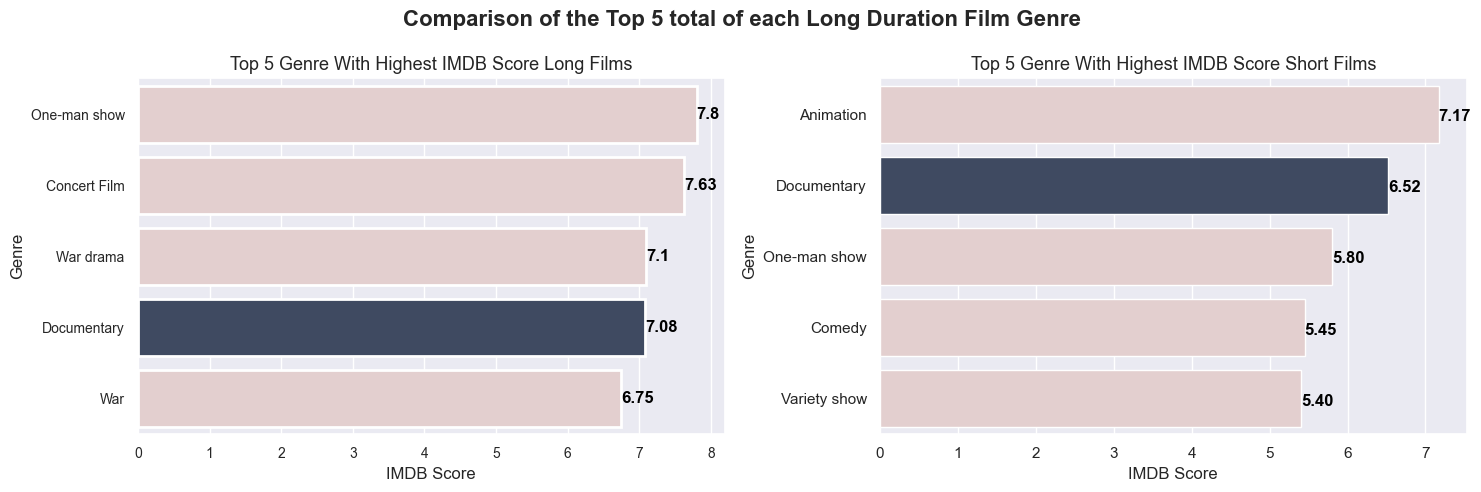

In [24]:
plt.figure(figsize=(15, 5))
sns.set(rc={'figure.figsize': (15, 6)})
plt.suptitle('Comparison of the Top 5 total of each Long Duration Film Genre', fontsize=16, fontweight='bold')

# First subplot
ax1 = plt.subplot(1, 2, 1)
sns.barplot(x='IMDB Score',
            y='Genre',
            data=average_scores,
            order=average_scores['Genre'].value_counts().index,
            palette=['#E7CBCB', '#E7CBCB', '#E7CBCB', '#394867', '#E7CBCB'],
            linewidth=2)

plt.title('Top 5 Genre With Highest IMDB Score Long Films', fontsize=13)
plt.ylabel('Genre', fontsize=12)
plt.xlabel('IMDB Score', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

for i, v in enumerate(average_scores['IMDB Score']):
    ax1.text(v, i, str(v), color='black', va='center', fontweight='bold')

# Second subplot
ax2 = plt.subplot(1, 2, 2)
plt.title('Top 5 Genre With Highest IMDB Score Short Films', fontsize=13)
sns.barplot(x='IMDB Score',
            y='Genre',
            data=average_scores2,
            palette=['#E7CBCB', '#394867', '#E7CBCB', '#E7CBCB', '#E7CBCB'])

for i, v in enumerate(average_scores2['IMDB Score']):
    ax2.text(v + 0, i + .1, '{:.2f}'.format(v), color='black', fontweight='bold')

plt.tight_layout()
plt.show()



<P>Dari grafik penilaian IMDb film panjang, kita dapat melihat beberapa insight menarik. Pertama, genre "One-man show" (7.80) dan "Concert Film" (7.63) mendapatkan IMDb Score tertinggi, menunjukkan bahwa penonton memberikan penilaian yang tinggi untuk jenis film tersebut. Di sisi lain, genre "War"(6.75) memiliki IMDb Score terendah, menandakan bahwa film perang mungkin tidak mendapatkan penilaian sebaik genre lainnya. Namun, genre "War drama" (7.10) dan "Documentary" (7.08) juga mendapatkan skor yang cukup tinggi, menunjukkan penerimaan yang baik dari penonton terhadap film-film dalam genre tersebut.

Dalam konteks film pendek, insight dari dataframe penilaian IMDb juga menarik. Film pendek dalam genre "Animation" (7.17) mendapatkan IMDb Score tertinggi, menunjukkan bahwa penonton cenderung memberikan penilaian yang tinggi untuk film pendek animasi. Di sisi lain, genre "Variety show" (5.40) dan "Comedy" (5.45) mendapatkan IMDb Score terendah, menandakan bahwa penonton mungkin tidak sebanyak itu menikmati film pendek dalam genre tersebut. Penting juga untuk dicatat bahwa genre "Documentary" muncul di kedua dataframe dengan skor yang berbeda. Pada film panjang, "Documentary" mendapatkan skor tinggi (7.08,), sedangkan pada film pendek skornya lebih rendah (6.52). Ini menunjukkan perbedaan preferensi penonton dalam menilai film dokumenter yang panjang dan pendek.<P>



In [25]:

# Membuat dataframe baru dengan kolom "Year", "Genre", dan "Count"
trend_by_year_genre = filtered_data.groupby(['year', 'Genre']).size().reset_index(name='Count')

# Menampilkan dataframe baru yang diurutkan berdasarkan tahun
trend_by_year_genre = trend_by_year_genre.sort_values(by='year')

# Menampilkan hasil
trend_by_year_genre.head()


,year,Genre,Count
0,2014,Documentary,1
1,2015,Documentary,6
2,2015,War drama,1
3,2015,Western,1
16,2016,War,1


In [26]:
# Menghitung jumlah genre dalam setiap tahun
genre_counts_by_year = trend_by_year_genre.groupby('year').size().reset_index(name='Genre Count')

# Memfilter dataframe untuk hanya menampilkan tahun dengan lebih dari 1 genre
filtered_trend_by_year_genre = trend_by_year_genre.merge(genre_counts_by_year, on='year')
filtered_trend_by_year_genre = filtered_trend_by_year_genre[filtered_trend_by_year_genre['Genre Count'] > 1]

# Menampilkan hasil
filtered_trend_by_year_genre.head()


,year,Genre,Count,Genre Count
1,2015,Documentary,6,3
2,2015,War drama,1,3
3,2015,Western,1,3
4,2016,War,1,13
5,2016,Thriller,2,13


In [27]:
# List genre yang ingin ditampilkan
genres = ['Documentary', 'Drama', 'Comedy', 'Romantic comedy', 'Thriller']

# Filter dataframe berdasarkan genre yang diinginkan
filtered_df = df[df['Genre'].isin(genres)]

# Membuat dataframe baru untuk menampilkan tren tiap tahun berdasarkan genre
trend_by_year_genre = filtered_df.groupby(['year', 'Genre']).size().reset_index(name='Count')

# Menampilkan dataframe baru yang diurutkan berdasarkan tahun
trend_by_year_genre = trend_by_year_genre.sort_values(by='year')

# Menampilkan hasil
trend_by_year_genre= trend_by_year_genre.drop([0, 1])
trend_by_year_genre.head()


,year,Genre,Count
2,2016,Comedy,1
3,2016,Documentary,12
4,2016,Drama,2
5,2016,Thriller,2
6,2017,Comedy,8


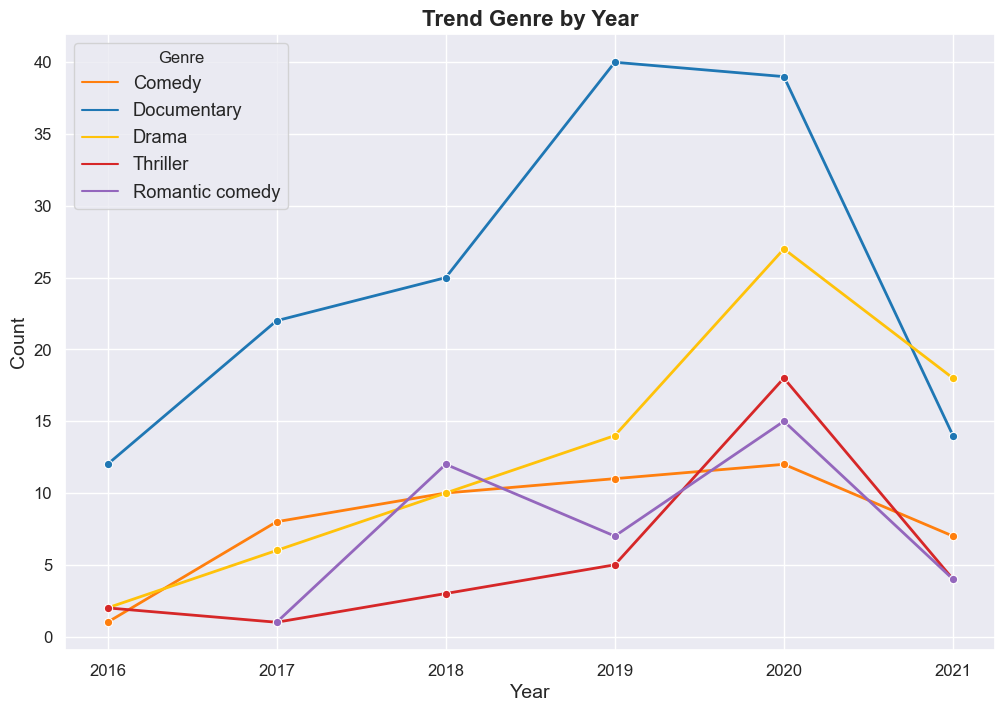

In [28]:
# Set style and size of the plot
sns.set(style="darkgrid", font_scale=1.2)
plt.figure(figsize=(12, 8))

# Define custom color palette
color_palette = ["#FF7F0E", "#1F77B4", "#FFC20A", "#D62728", "#9467BD"]

# Create the line plot with customizations
sns.lineplot(data=trend_by_year_genre, x="year", y="Count", hue="Genre", marker="o", palette=color_palette, linewidth=2)

# Set the title and labels
plt.title("Trend Genre by Year", fontweight="bold", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Customize legend
plt.legend(title="Genre", title_fontsize=12, loc="upper left")

# Increase the tick label size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

**Analisis** 
<p>Dari visualisai trend Genre pertahun untuk setiap genre, kita dapat melihat insight bahwa genre "Documentary" memiliki jumlah film terbanyak dan juga setiap tahunnya selalu mgalami kenaikan. Namun dari grafik diatas bisa dilihat bahwa mulai dari tahun 2020 mengalami penurunan jumlah genre Dokumneter, hal ini terjadi karena pada tahun tersebut terjadii wabah virus Corona. Hal ini menyebabkan terjadinya kendala dalm produksi film karena banyak pemerintaah melakukan himbauan untuk melakukan pembatasan interaksi.

In [29]:
language_counts = df['Language'].value_counts().reset_index()
language_counts.columns = ['Language', 'Count']
language_counts= language_counts.head()
language_counts

,Language,Count
0,English,401
1,Hindi,33
2,Spanish,31
3,French,20
4,Italian,14


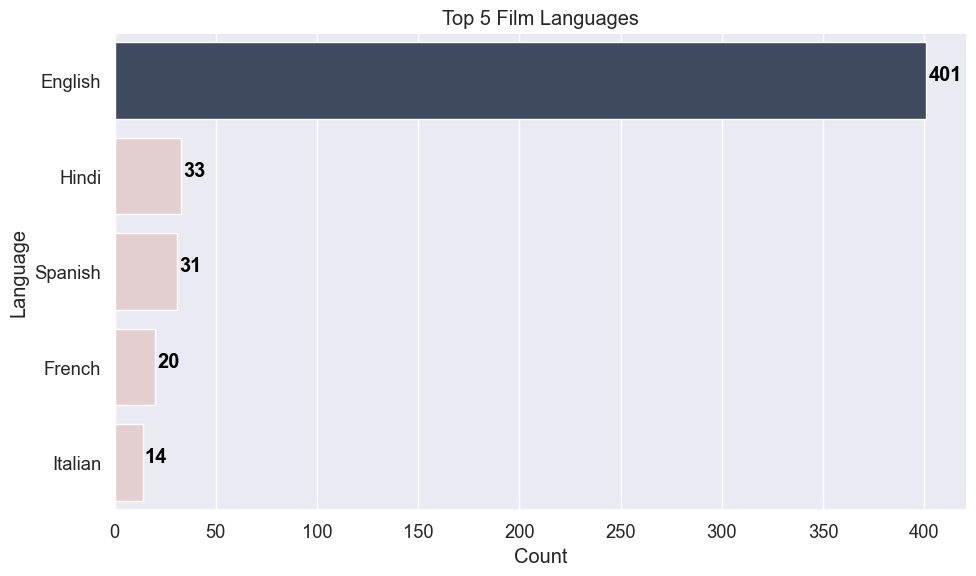

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Count',
            y='Language',
            data=language_counts,
            palette=['#394867', '#E7CBCB', '#E7CBCB', '#E7CBCB', '#E7CBCB'])

plt.title('Top 5 Film Languages')
plt.xlabel('Count')
plt.ylabel('Language')

# Add annotations
for i, v in enumerate(language_counts['Count']):
    plt.text(v + 1, i, str(v), color='black', fontweight='bold')

# Add subtitle
plt.tight_layout()
plt.show()


**Analisis** 
Dari data di atas, terdapat beberapa analisis yang dapat diambil terkait dengan bahasa film yang tercatat dalam data tersebut bahwa bahasa Inggris (English) adalah bahasa yang dominan dalam jumlah film yang tercatat. Dengan 401 film, bahasa Inggris mendominasi dalam jumlah produksi film yang tercatat dalam data tersebut. Namun perlu di ingat untuk produser film untuk tetap mempertimbangkan penggunaan bahasa lain selain bahasa Inggris karena bahasa lain juga memiliki potensi audiens yang besar. 

---
## **CONCLUSION**

1. Dari data Netflix Original Films Original, terdapat total 584 film yang digolongkan kedalam film panjang dengan jumlah 513 dan film pendek memiliki jumlah 71.
2. Dari kelompok Film panjang dan film pendek, film dengan genre Dokumenter menjadi film yang paling banyak diproduksi.
3. Dengan banyaknya jumlah yang ada, dari kelompok film panjang dan pendek genre Dokumenter masiah termasuk kedalam 5 besar rata-rata penilaian IMDB.
4. Genre Dokumenter memiliki jumlah film terbanyak dan juga setiap tahunnya selalu mgalami kenaikan secara linear, dan behenti pada waktu terjadi tahun 2020 karena wabah Covid.
5. Bahasa Inggris adalah bahasa dominan dalam industri film yang tercatat dalam data tersebut, diikuti oleh bahasa Hindi, Spanyol, Prancis, dan Italia.  


---
## **RECOMMENDATION**

1. Direkomendasikan Netflix untuk melanjutkan investasi dalam produksi film dokumenter. Genre dokumenter telah terbukti memiliki penilaian yang bagus dari audiens, baik dalam kelompok film berdurasi panjang maupun pendek. Meskipun jumlah produksi dokumenter meningkat secara linear, genre ini tetap mampu bersaing dalam kategori rata-rata IMDb tertinggi. Ini menunjukkan bahwa film dokumenter memiliki potensi untuk memberikan hasil yang baik dan tetap diminati oleh penonton.

2. Selain genre dokumenter, direkomendasikan juga untuk mempertimbangkan genre lain seperti drama, komedi, romantic comedy, dan thriller dalam produksi film berdurasi panjang. Genre-genre ini memiliki rata-rata skor IMDb tertinggi dalam kelompok film berdurasi panjang, ini menunjukkan bahwa film-film dalam genre-genre tersebut memiliki potensi untuk mendapatkan penilaian yang tinggi dari penonton. Untuk produksi film berdurasi pendek, direkomendasikan untuk fokus pada genre seperti animasi, one-man show, komedi, dan variety show. Genre-genre ini memiliki rata-rata skor IMDb tertinggi dalam kelompok film berdurasi pendek. Hal ini menunjukkan bahwa film-film pendek dalam genre-genre tersebut mungkin lebih disukai oleh penonton.

3. Bahasa Inggris adalah bahasa internasional yang banyak digunakan dan memiliki pangsa pasar yang luas. Oleh karena itu direkomendasikan untuk mempertimbangkan produksi film menggunakan bahasa Inggris. Dalam data sebelumnya, bahasa Inggris mendominasi jumlah film yang tercatat hinya 401 dari total 584 film. Dengan memproduksi film dalam bahasa Inggris, dapat meningkatkan aksesibilitas film kepada penonton global. Oleh karena itu, Netflix dapat mempertimbangkan untuk memberikan perhatian lebih pada Bahasa inggris karena terbukti banyak digunakan, sambil tetap terbuka terhadap kesempatan dan potensi bahasa lain. 

4. Namun, penting untuk diingat bahwa preferensi penonton dapat bervariasi, dan analisis ini didasarkan pada data yang diberikan. Meskipun genre dokumentasi menjadi salah satu yang paling populer, hal ini tidak berarti genre lain tidak memiliki potensi untuk sukses. Oleh karena itu, Netflix dapat mempertimbangkan untuk memberikan perhatian lebih pada genre dokumenter yang sukses, sambil tetap terbuka terhadap kesempatan dan potensi genre lain yang menarik.

In [31]:
df.to_excel('Netflix.xlsx')